In [1]:
import numpy as np
import matplotlib.pyplot as plt
from aeons.endpoint import EndModel
from aeons.utils import *
from aeons.beta import get_d_G_post
from aeons.plotting import plot_quantiles

In [113]:
name, samples = get_samples('rosenbrock_10', reduced=False)

In [121]:
samples.d_G(), samples.logL.var() * 2, -2 * samples.logL.median()

(16.98145895687635, 16.981458956876352, 14.085036527988741)

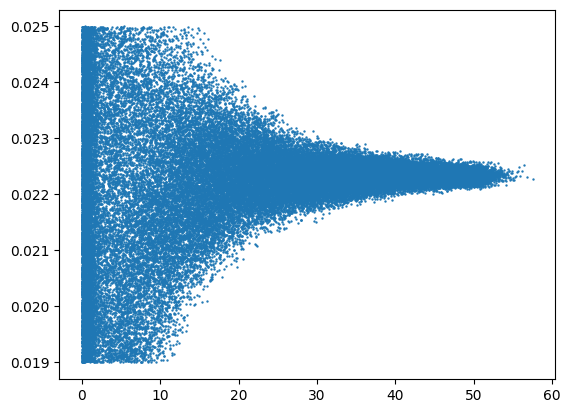

In [112]:
plt.scatter(-samples.logX(), samples['omegabh2'], s=0.5)

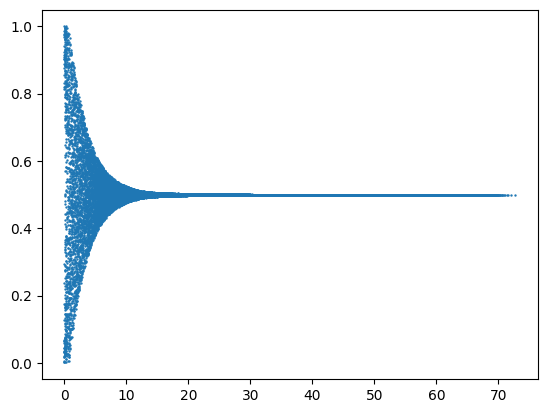

In [99]:
plt.scatter(-samples.logX(), samples[4], s=.5)

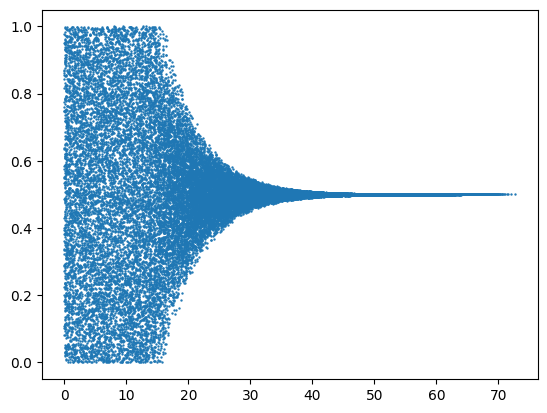

In [98]:
plt.scatter(-samples.logX(), samples[0], s=.5)

In [88]:
samples.d_G(), samples.logL.var()

(16.98145895687635, 8.490729478438176)

logL    Axes(0.040...
dtype: object

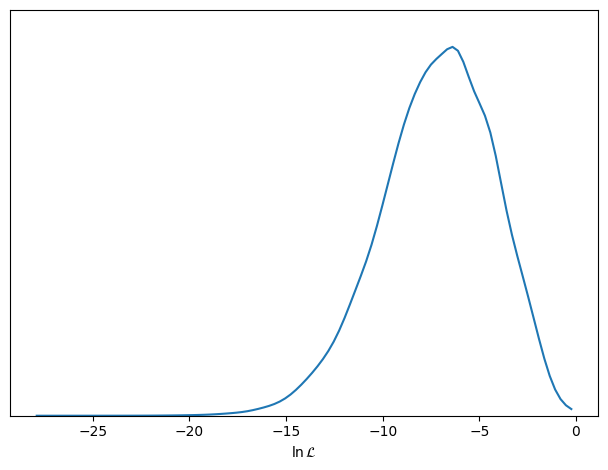

In [86]:
samples.plot_1d(['logL'])

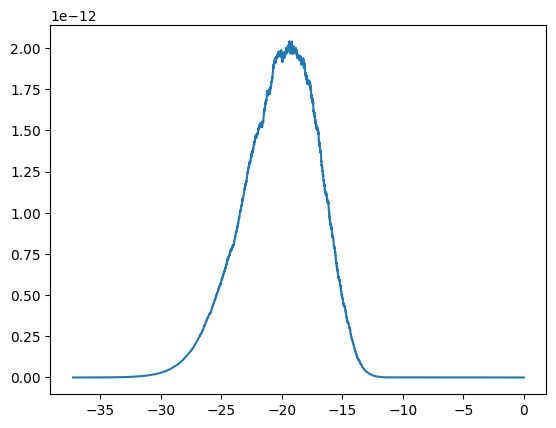

In [85]:
plt.plot(samples.logX(), np.exp(samples.logL + samples.logX()))

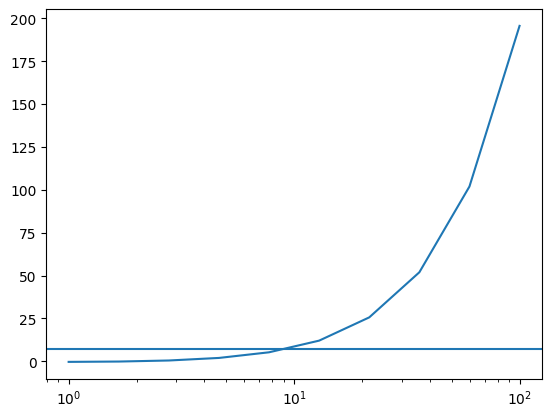

In [57]:
d = np.logspace(0, 2, 10)
plt.plot(d, d/2 * np.log(d/2))
plt.axhline(np.log(1e3))
plt.xscale('log')

In [2]:
from anesthetic.examples.perfect_ns import (
    gaussian, correlated_gaussian, wedding_cake)

In [4]:
mean_3d = np.array([0.5, 0.5])
mean_6d = np.array([0.5, 0.5])
cov_3d = np.diag([1e4, 1e-6])
cov_6d = np.diag([1e-3, 1e-6])
# create 6d rotation matrix in numpy
theta = np.radians(45)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))
cov_3d = R @ cov_3d @ R.T
cov_6d = R @ cov_6d @ R.T

# bounds = np.array([[0, 1]] * 3 + [[0.5 - 1e-2, 0.5 + 1e-2]] * 3)
bounds = np.array([[0,1]] * 2)

In [6]:
nlive = 500
samples_45 = correlated_gaussian(nlive, mean_6d, cov_6d, bounds=bounds)

In [7]:
samples = samples_45
model = EndModel(samples)
true_endpoint = model.true_endpoint()
true_logXf = samples.logX().iloc[true_endpoint]
samples = samples.iloc[:true_endpoint]

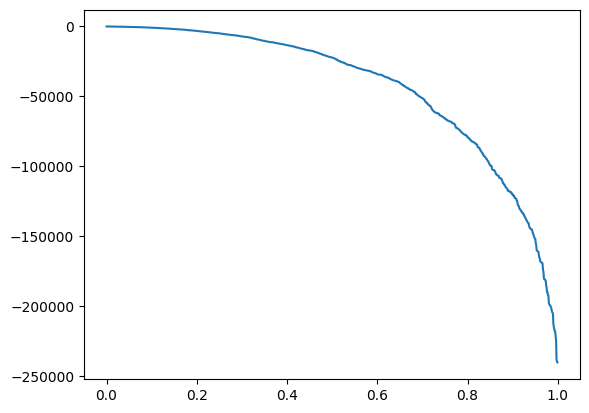

In [27]:
logX = samples.logX()
X = np.exp(logX)
plt.plot(X, samples.logL)

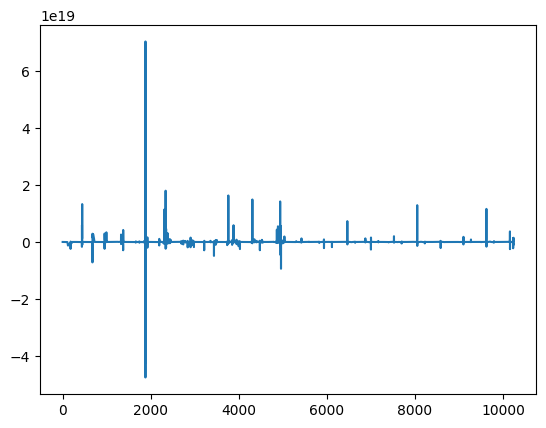

In [38]:
# Find dlogL/dX
plt.plot(np.diff(samples.logL, 1000)/np.diff(X, 1000))

In [49]:
delta_logL = samples.logL[:-500:500].values - samples.logL[500::500].values
delta_X = X[:-500:500].values - X[500::500].values

In [52]:
delta_logL/delta_X

array([-436896.89667475,  -66774.43527205,  -26182.63413123,
        -11762.16453272,   -6164.43137649,   -5543.90155115,
         -5972.14248358,   -5869.18159966,   -5947.75011827,
         -6061.90449193,   -5904.73720973,   -5604.02067554,
         -6006.5511727 ,   -5922.00797435,   -6306.27650796,
         -6220.89782507,   -6458.20966581,   -6295.88277905,
         -6438.96734174,   -6138.91004743,   -6055.53293187,
         -7234.11889225])

       weights      
500    0.000000e+00    -22198.505456
1000   0.000000e+00     -4235.056068
1500   0.000000e+00      -947.326786
2000   1.907499e-125     -293.825769
2500   1.725838e-60      -143.550768
3000   2.290216e-31       -75.774052
3500   1.919707e-15       -38.391325
4000   1.303769e-07       -19.640694
4500   1.010816e-03        -9.968968
5000   7.326458e-02        -4.968785
5500   4.275842e-01        -2.492742
6000   6.833150e-01        -1.308051
6500   6.362660e-01        -0.665460
7000   4.275687e-01        -0.346098
7500   2.466079e-01        -0.174679
8000   1.306472e-01        -0.089215
8500   6.658334e-02        -0.044447
9000   3.343058e-02        -0.022443
9500   1.641242e-02        -0.011169
10000  8.065239e-03        -0.005758
10500  3.933297e-03        -0.003081
11000  1.927406e-03        -0.001475
Name: logL, dtype: float64

In [94]:
iterations = make_iterations(true_endpoint, 50)
logXfs, d_Gs = model.inferences(get_d_G_post, iterations=iterations)

 Iteration 10917 of 10917, d=2.0

In [97]:
plt.figure(figsize=(4,2))
logXs = samples.logX().iloc[iterations]
plot_quantiles(-logXs, d_Gs, ax=plt.gca())

/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/gui/plot.py:226: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout()


In [96]:
samples_45.gui()

In [104]:
plt.plot(samples.logX(), samples.logL)

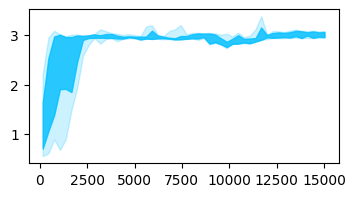

In [ ]:
plt.figure(figsize=(4,2))
plot_quantiles(iterations, d_Gs, ax=plt.gca())

In [124]:
ndead = 27000
points = samples.loc[samples.logL_birth < samples.logL.iloc[ndead]].recompute()
lives = points.iloc[ndead:]
lives_eq_weight = lives.iloc[:, :6].values

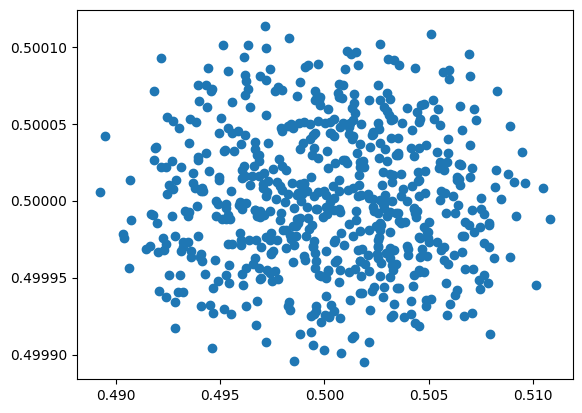

In [129]:
plt.scatter(lives_eq_weight[:, 0], lives_eq_weight[:, 3])

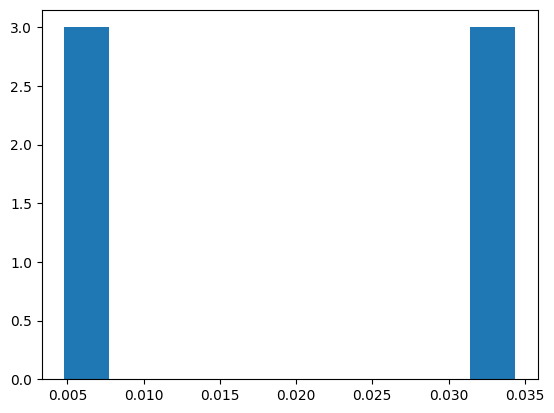

In [122]:
cov = np.cov(lives_eq_weight.T)
plt.hist(np.linalg.eigvals(cov), bins=10);

In [34]:
name, samples = get_samples('rosenbrock_1000')
model = EndModel(samples)
true_endpoint = model.true_endpoint()
true_logXf = samples.logX().iloc[true_endpoint]
samples = samples.iloc[:true_endpoint]

In [38]:

iterations = make_iterations(true_endpoint, 50)
logXfs, d_Gs = model.inferences(d_G_method=get_d_G_post, iterations=iterations)

 Iteration 10018 of 10018, d=2.0

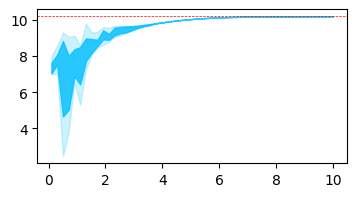

In [44]:
from aeons.plotting import plot_quantiles
plt.figure(figsize=(4,2))
logXs = samples.logX().iloc[iterations]
plot_quantiles(-logXs, -logXfs, true=-true_logXf, ax=plt.gca())

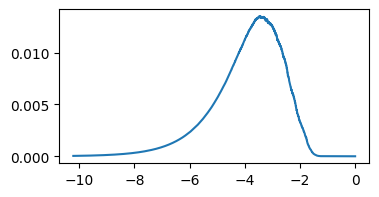

In [46]:
logX = samples.logX()
logL = samples.logL
plt.figure(figsize=(4,2))
plt.plot(logX, np.exp(logX + logL))